<a href="https://pangeos.eu/" target="_blank">
<center><img src="../images/1-logos-pan-eu-cost.png" alt="logos" width="100%"/></center>
</a>

PANGEOS summer taining school 2024

EXAMPLE OF UNCERTAINTY PROPAGATION FOR 

# CASE 3: Propagation of retrieved traits to higher level products

**Authors:**
Andreas Hueni (andreas.hueni@geo.uzh.ch), Mike Werfeli (mike.werfeli@geo.uzh.ch) and Egor Prikaziuk (e.prikaziuk@utwente.nl)

<div class="alert alert-success">
Using SCOPE from MATLAB is easy once you have a MATLAB license.
</div>

<div class="alert alert-warning">
Calling MATLAB from Python is complicated because <strong>matlab-python bridge</strong> requires a matching Python version.
</div>

If you can not run this example it is ok. 

There's another notebook that shows how to propagate the uncertainty throgh SCOPE purely from the distributions of parameters, outside punpy and covariances

# Learning objectives

**After follwing this notebook you will be able to ...**
- install `matlabengine` package to run MATLAB from Python
- call SCOPE model from Python


# TOC

1. [SCOPE model](#1)
2. [matlab engine installation](#2)
3. [SCOPE run](#3)
    1. [3-1](#3-1) Provide path to the SCOPE model
    2. [3-2](#3-2) Adjust input files
    3. [3-3](#3-3) Provide values of input variables
    4. [3-4](#3-4) Call SCOPE from Python
    5. [3-5](#3-5) Read the output
    6. [3-6](#3-6) Plot and explore

# 1 
## SCOPE model

[back to TOC](#TOC)

<img align="right" src="../images/3-scope2.0.png" alt="SCOPE logo" width="40%"/> 

Soil Canopy Observation, Photochemistry and Energy fluxes (SCOPE, Van der Tol et al., 2009, Yang et al., 2021) is a radiative transfer and energy balance model.

The code is written in MATLAB https://github.com/Christiaanvandertol/SCOPE

The documentation and model description is available https://scope-model.readthedocs.io/en/master/

There are [YouTube](https://youtube.com/playlist?list=PLMKVJ8XOixyTEcUkYDw1YTgKHi-FgimF8&si=E-f3O-j3PrMREL97) user guides on how to use the model 

# 2
## matlab engine installation

[back to TOC](#TOC)

1. The Python version should match the MATLAB version
    - The list of Python versions compatible with MATLAB versions https://nl.mathworks.com/support/requirements/python-compatibility.html
2. The package `matlabengine` should be installed from the `setup.py` **distributed with MATLAB**
    - **do not use `pip install matlabengine` it will not work**
    - the package setup.py file is located in `matlabroot\extern\engines\python`
    - type `matlabroot` in MATALB command prompt to find out where it is
    - for me is */opt/matlab/R2018a/bin/matlab*
        - navigate to this location in your terminal or anaconda promt
        - usually the command is `cd /opt/matlab/R2018a/bin/matlab/extern/engines/python`
        - then `python -m pip install .`

The installation is described in https://nl.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html

The initialization of the matlab engine **may take up to a minute**

In [1]:
%%time
import matlab.engine
eng = matlab.engine.start_matlab()

CPU times: total: 828 ms
Wall time: 58.5 s


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

plt.rcParams.update({'font.size': 16})

# 3
## SCOPE run

[back to TOC](#TOC)

1. Download SCOPE from https://github.com/Christiaanvandertol/SCOPE
    - keep the path ``path_scope``
2. Adjust input files (can be done by hand)
    - input/setoptions.csv
        - verify = 0
    - set_parameter_filenames.csv
          - input_data_latin_hypercube.csv -> input_data_default.csv
3. Provide values (from the distribution) for selected input variables in **input/input_data_default.csv**
    - variable names can be searched in the documentation, for example meteo parameters https://scope-model.readthedocs.io/en/master/structs/input/meteo.html#fields
4. Call SCOPE from Python
    - cd matlab engine to ``path_scope``
    - run SCOPE
5. read output from the csv file in the **output** folder
6. plot and explore

## 3-1
### Provide path to the SCOPE model
[back to TOC](#TOC)

In [3]:
# provide here full path to the SCOPE model folder, the one where SCOPE.m file is
path_scope = Path(r'C:\Users\PrikaziukE\Downloads\SCOPE-master')

## 3-2
### Adjust input files
[back to TOC](#TOC)

This can be done once. This will overwrite files

In [4]:
path_csv = path_scope / 'set_parameter_filenames.csv'

df = pd.read_csv(path_csv, header=None)
df.iloc[0, 2] = 'input_data_default.csv'
df.to_csv(path_csv, header=False, index=False)

In [5]:
path_csv = path_scope / 'input' / 'setoptions.csv'

df = pd.read_csv(path_csv, header=None)
df.loc[df[1] == 'verify', 0] = 0
df.to_csv(path_csv, header=False, index=False)

## 3-3
### Provide values of input variables
[back to TOC](#TOC)

here in example of LAI is given

In [6]:
path_csv = path_scope / 'input' / 'input_data_default.csv'

df = pd.read_csv(path_csv, header=None, index_col=0)
df = df[[1]]

var_name = 'LAI'
values = [2.5, 2.7, 3, 3.3]
df_insert = pd.DataFrame([values], index=[var_name])
df_insert.columns += 2  # to avoid duplicated column error on join

df = df.join(df_insert)
df.to_csv(path_csv, header=False)
df.head()

,1,2,3,4,5
0,,,,,
PROSPECT,NaN,NaN,NaN,NaN,NaN
Cab,40.000,NaN,NaN,NaN,NaN
Cca,10.000,NaN,NaN,NaN,NaN
Cdm,0.012,NaN,NaN,NaN,NaN
Cw,0.009,NaN,NaN,NaN,NaN


## 3-4
### Call SCOPE from Python
[back to TOC](#TOC)

In [7]:
eng.cd(path_scope.as_posix(), nargout=0)

In [8]:
%%time
eng.SCOPE(nargout=0)

In [9]:
output_dir = eng.workspace['Output_dir']
output_dir

'output\\verification_run_2024-12-08-1032\\'

## 3-5
### Read the output
[back to TOC](#TOC)

In [10]:
path_output = path_scope / output_dir

In [11]:
df = pd.read_csv(path_output / 'vegetation.csv', skiprows=[1, 2])  # 1 - units, 2 - value we did not change
df

,simulation_number,year,DoY,Photosynthesis,Electron_transport,NPQ_energy,NPQ_photon,canopy_level_FQE,LST,emis,GPP
0,2,0,0,18.34118,140.8014,44.31496,215.1400,0.012479,296.3763,0.976884,19.76428
1,3,0,0,19.13445,147.4095,44.94205,218.2342,0.012466,296.3181,0.977467,20.67196
2,4,0,0,20.15124,156.1072,45.74279,222.1880,0.012432,296.2636,0.978143,21.86081
3,5,0,0,20.98676,163.5320,46.40050,225.4380,0.012392,296.2402,0.978639,22.86888


## 3-6
### Plot and explore
[back to TOC](#TOC)

In the example there were 4 values of LAI `[2.5, 2.7, 3, 3.3]`

SCOPE returned 4 values of GPP, corresponing to those values of LAI

In [12]:
df.GPP

0    19.76428
1    20.67196
2    21.86081
3    22.86888
Name: GPP, dtype: float64

Text(0.5, 1.0, 'Ouput of the SCOPE model runs')

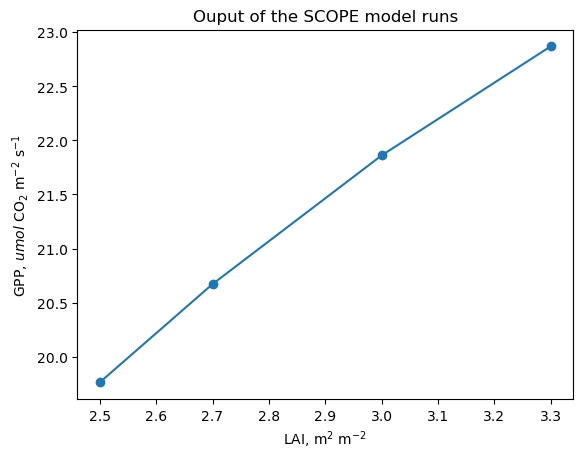

In [18]:
ax = plt.subplot()

ax.plot(values, df.GPP, 'o-')
ax.set_xlabel(f'{var_name}, ' + 'm$^2$ m$^{-2}$')
ax.set_ylabel('GPP, ' + '$umol$ CO$_2$ m$^{-2}$ s$^{-1}$')
ax.set_title('Ouput of the SCOPE model runs')